# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import json 
import ipympl
# %matplotlib
from pylab import rcParams
import math
import requests

In [2]:
clusteringDB=requests.get("https://diseasex-backend.herokuapp.com/AnimalCases")
clusteringDB.status_code

200

In [3]:
json_data = clusteringDB.json()
# print(type(json_data))
# print(json_data)

In [4]:
with open('humanCase.json', 'w') as json_file:
    json.dump(json_data, json_file)

## Converting JSON to CSV

In [5]:
import json  # For JSON loading
import csv  # For CSV dict writer


def get_leaves(item, key=None, key_prefix=""):
    
    if isinstance(item, dict):
        leaves = {}
        for item_key in item.keys():
            temp_key_prefix = (
                item_key if (key_prefix == "") else (key_prefix + "_" + str(item_key))
            )
            leaves.update(get_leaves(item[item_key], item_key, temp_key_prefix))
        return leaves
    elif isinstance(item, list):
        leaves = {}
        elements = []
        for element in item:
            if isinstance(element, dict) or isinstance(element, list):
                leaves.update(get_leaves(element, key, key_prefix))
            else:
                elements.append(element)
        if len(elements) > 0:
            leaves[key] = elements
        return leaves
    else:
        return {key_prefix: item}


with open("humanCase.json") as f_input, open("final.csv", "w", newline="") as f_output:
    json_data = json.load(f_input, strict=False)
    fieldnames = set()
    for entry in json_data:
        fieldnames.update(get_leaves(entry).keys())
    csv_output = csv.DictWriter(f_output, delimiter=",", fieldnames=sorted(fieldnames))
    csv_output.writeheader()
    csv_output.writerows(get_leaves(entry) for entry in json_data)

## Reading Data

In [6]:
df=pd.read_csv('final.csv',engine='python')
df
# df.dropna(axis=0,how='any',subset=['lat','long'],inplace=True)

,__v,_id,animal__id,animal_livestock__id,animal_livestock_breed,animal_livestock_population,animal_nextVaccination,animal_owner__id,animal_owner_address,animal_owner_contact,...,healthCenter_lat,healthCenter_lng,healthCenter_name,healthCenter_pincode,healthCenter_total_affected,healthCenter_total_deaths,healthCenter_total_recovered,healthCenter_web,lat,lng
0,0,5f20745991742d0754b6dc46,5f20745991742d0754b6dc47,5f20745991742d0754b6dc48,Poultry,21492,2020-07-28T18:12:26.192Z,5f20745991742d0754b6dc49,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,Fortis Hospital,302018,17,5,32,www.gmail.com,26.963830,75.735500
1,0,5f22cad53d219e35c441a142,5f22cad53d219e35c441a143,5f22cad53d219e35c441a144,Poultry,63290,2020-07-30T13:14:53.393Z,5f22cad53d219e35c441a145,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,18,15,17,www.facebook.com,26.424933,75.638166
2,0,5f22cb223d219e35c441a158,5f22cb223d219e35c441a159,5f22cb223d219e35c441a15a,Cattle,15561,2020-07-30T13:14:53.393Z,5f22cb223d219e35c441a15b,"Phulera,Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,14,14,www.facebook.com,26.994771,75.397655
3,0,5f22cb793d219e35c441a177,5f22cb793d219e35c441a178,5f22cb793d219e35c441a179,Bufflow,19547,2020-07-30T13:14:53.393Z,5f22cb793d219e35c441a17a,"Ashok Marg, Sanganer, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,20,14,12,www.facebook.com,26.323539,75.138506
4,0,5f22cc1a3d219e35c441a19b,5f22cc1a3d219e35c441a19c,5f22cc1a3d219e35c441a19d,Poultry,90277,2020-07-30T13:14:53.393Z,5f22cc1a3d219e35c441a19e,"LNMIIT, Jamdoli, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,15,15,www.facebook.com,26.370583,75.179949
5,0,5f22cca83d219e35c441a1e3,5f22cca83d219e35c441a1e4,5f22cca83d219e35c441a1e5,Pig,70000,2020-07-30T13:14:53.393Z,5f22cca83d219e35c441a1e6,"252, KhatiPura Road, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,15,16,www.facebook.com,26.290159,75.790555
6,0,5f22d54b3d219e35c441a2d8,5f22d54b3d219e35c441a2d9,5f22d54b3d219e35c441a2da,Pig,26766,2020-07-30T13:14:53.393Z,5f22d54b3d219e35c441a2db,"Ashok Marg, Vaishali Nagar,Japur",919462904912,...,26.92207,75.778885,SMS Hospital,32123,19,24,17,www.github.com,26.186116,75.440968
7,0,5f22d6303d219e35c441a30e,5f22d6303d219e35c441a30f,5f22d6303d219e35c441a310,Bufflow,95623,2020-07-30T13:14:53.393Z,5f22d6303d219e35c441a311,"LNMIIT,Jamdoli,Jaipur",918302098279,...,26.92207,75.778885,SMS Hospital,32123,16,24,16,www.github.com,26.219464,75.867318
8,0,5f22d6a23d219e35c441a34a,5f22d6a23d219e35c441a34b,5f22d6a23d219e35c441a34c,Bull,48598,2020-07-30T13:14:53.393Z,5f22d6a23d219e35c441a34d,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,SMS Hospital,32123,17,24,16,www.github.com,26.548102,75.490422
9,0,5f22d6f83d219e35c441a38b,5f22d6f83d219e35c441a38c,5f22d6f83d219e35c441a38d,Duck,57521,2020-07-30T13:14:53.393Z,5f22d6f83d219e35c441a38e,"678/28, Krishan Kuteer, New Shringaar Chavri",919460064536,...,26.92207,75.778885,SMS Hospital,32123,18,24,16,www.github.com,26.981699,75.814503


In [7]:
df.dropna(subset=['lat', 'lng'],inplace=True)

In [8]:
# X=df.loc[:,['disease_name','lat','lng']]
X = df
X

,__v,_id,animal__id,animal_livestock__id,animal_livestock_breed,animal_livestock_population,animal_nextVaccination,animal_owner__id,animal_owner_address,animal_owner_contact,...,healthCenter_lat,healthCenter_lng,healthCenter_name,healthCenter_pincode,healthCenter_total_affected,healthCenter_total_deaths,healthCenter_total_recovered,healthCenter_web,lat,lng
0,0,5f20745991742d0754b6dc46,5f20745991742d0754b6dc47,5f20745991742d0754b6dc48,Poultry,21492,2020-07-28T18:12:26.192Z,5f20745991742d0754b6dc49,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,Fortis Hospital,302018,17,5,32,www.gmail.com,26.963830,75.735500
1,0,5f22cad53d219e35c441a142,5f22cad53d219e35c441a143,5f22cad53d219e35c441a144,Poultry,63290,2020-07-30T13:14:53.393Z,5f22cad53d219e35c441a145,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,18,15,17,www.facebook.com,26.424933,75.638166
2,0,5f22cb223d219e35c441a158,5f22cb223d219e35c441a159,5f22cb223d219e35c441a15a,Cattle,15561,2020-07-30T13:14:53.393Z,5f22cb223d219e35c441a15b,"Phulera,Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,14,14,www.facebook.com,26.994771,75.397655
3,0,5f22cb793d219e35c441a177,5f22cb793d219e35c441a178,5f22cb793d219e35c441a179,Bufflow,19547,2020-07-30T13:14:53.393Z,5f22cb793d219e35c441a17a,"Ashok Marg, Sanganer, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,20,14,12,www.facebook.com,26.323539,75.138506
4,0,5f22cc1a3d219e35c441a19b,5f22cc1a3d219e35c441a19c,5f22cc1a3d219e35c441a19d,Poultry,90277,2020-07-30T13:14:53.393Z,5f22cc1a3d219e35c441a19e,"LNMIIT, Jamdoli, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,15,15,www.facebook.com,26.370583,75.179949
5,0,5f22cca83d219e35c441a1e3,5f22cca83d219e35c441a1e4,5f22cca83d219e35c441a1e5,Pig,70000,2020-07-30T13:14:53.393Z,5f22cca83d219e35c441a1e6,"252, KhatiPura Road, Jaipur",919462904912,...,26.92207,75.778885,Mittal Hospital,305001,19,15,16,www.facebook.com,26.290159,75.790555
6,0,5f22d54b3d219e35c441a2d8,5f22d54b3d219e35c441a2d9,5f22d54b3d219e35c441a2da,Pig,26766,2020-07-30T13:14:53.393Z,5f22d54b3d219e35c441a2db,"Ashok Marg, Vaishali Nagar,Japur",919462904912,...,26.92207,75.778885,SMS Hospital,32123,19,24,17,www.github.com,26.186116,75.440968
7,0,5f22d6303d219e35c441a30e,5f22d6303d219e35c441a30f,5f22d6303d219e35c441a310,Bufflow,95623,2020-07-30T13:14:53.393Z,5f22d6303d219e35c441a311,"LNMIIT,Jamdoli,Jaipur",918302098279,...,26.92207,75.778885,SMS Hospital,32123,16,24,16,www.github.com,26.219464,75.867318
8,0,5f22d6a23d219e35c441a34a,5f22d6a23d219e35c441a34b,5f22d6a23d219e35c441a34c,Bull,48598,2020-07-30T13:14:53.393Z,5f22d6a23d219e35c441a34d,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,26.92207,75.778885,SMS Hospital,32123,17,24,16,www.github.com,26.548102,75.490422
9,0,5f22d6f83d219e35c441a38b,5f22d6f83d219e35c441a38c,5f22d6f83d219e35c441a38d,Duck,57521,2020-07-30T13:14:53.393Z,5f22d6f83d219e35c441a38e,"678/28, Krishan Kuteer, New Shringaar Chavri",919460064536,...,26.92207,75.778885,SMS Hospital,32123,18,24,16,www.github.com,26.981699,75.814503


In [9]:
count = X['disease_name'].nunique()
# df['hID'].nunique()
count

8

In [10]:
X['disease'] = X['disease_name']

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
dfle = X
dfle.disease = le.fit_transform(dfle.disease)
dfle

,__v,_id,animal__id,animal_livestock__id,animal_livestock_breed,animal_livestock_population,animal_nextVaccination,animal_owner__id,animal_owner_address,animal_owner_contact,...,healthCenter_lng,healthCenter_name,healthCenter_pincode,healthCenter_total_affected,healthCenter_total_deaths,healthCenter_total_recovered,healthCenter_web,lat,lng,disease
0,0,5f20745991742d0754b6dc46,5f20745991742d0754b6dc47,5f20745991742d0754b6dc48,Poultry,21492,2020-07-28T18:12:26.192Z,5f20745991742d0754b6dc49,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,75.778885,Fortis Hospital,302018,17,5,32,www.gmail.com,26.963830,75.735500,1
1,0,5f22cad53d219e35c441a142,5f22cad53d219e35c441a143,5f22cad53d219e35c441a144,Poultry,63290,2020-07-30T13:14:53.393Z,5f22cad53d219e35c441a145,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,75.778885,Mittal Hospital,305001,18,15,17,www.facebook.com,26.424933,75.638166,0
2,0,5f22cb223d219e35c441a158,5f22cb223d219e35c441a159,5f22cb223d219e35c441a15a,Cattle,15561,2020-07-30T13:14:53.393Z,5f22cb223d219e35c441a15b,"Phulera,Jaipur",919462904912,...,75.778885,Mittal Hospital,305001,19,14,14,www.facebook.com,26.994771,75.397655,6
3,0,5f22cb793d219e35c441a177,5f22cb793d219e35c441a178,5f22cb793d219e35c441a179,Bufflow,19547,2020-07-30T13:14:53.393Z,5f22cb793d219e35c441a17a,"Ashok Marg, Sanganer, Jaipur",919462904912,...,75.778885,Mittal Hospital,305001,20,14,12,www.facebook.com,26.323539,75.138506,2
4,0,5f22cc1a3d219e35c441a19b,5f22cc1a3d219e35c441a19c,5f22cc1a3d219e35c441a19d,Poultry,90277,2020-07-30T13:14:53.393Z,5f22cc1a3d219e35c441a19e,"LNMIIT, Jamdoli, Jaipur",919462904912,...,75.778885,Mittal Hospital,305001,19,15,15,www.facebook.com,26.370583,75.179949,2
5,0,5f22cca83d219e35c441a1e3,5f22cca83d219e35c441a1e4,5f22cca83d219e35c441a1e5,Pig,70000,2020-07-30T13:14:53.393Z,5f22cca83d219e35c441a1e6,"252, KhatiPura Road, Jaipur",919462904912,...,75.778885,Mittal Hospital,305001,19,15,16,www.facebook.com,26.290159,75.790555,5
6,0,5f22d54b3d219e35c441a2d8,5f22d54b3d219e35c441a2d9,5f22d54b3d219e35c441a2da,Pig,26766,2020-07-30T13:14:53.393Z,5f22d54b3d219e35c441a2db,"Ashok Marg, Vaishali Nagar,Japur",919462904912,...,75.778885,SMS Hospital,32123,19,24,17,www.github.com,26.186116,75.440968,2
7,0,5f22d6303d219e35c441a30e,5f22d6303d219e35c441a30f,5f22d6303d219e35c441a310,Bufflow,95623,2020-07-30T13:14:53.393Z,5f22d6303d219e35c441a311,"LNMIIT,Jamdoli,Jaipur",918302098279,...,75.778885,SMS Hospital,32123,16,24,16,www.github.com,26.219464,75.867318,3
8,0,5f22d6a23d219e35c441a34a,5f22d6a23d219e35c441a34b,5f22d6a23d219e35c441a34c,Bull,48598,2020-07-30T13:14:53.393Z,5f22d6a23d219e35c441a34d,"678/28, Krishan Kuteer, New Shringaar Chavri",919462904912,...,75.778885,SMS Hospital,32123,17,24,16,www.github.com,26.548102,75.490422,5
9,0,5f22d6f83d219e35c441a38b,5f22d6f83d219e35c441a38c,5f22d6f83d219e35c441a38d,Duck,57521,2020-07-30T13:14:53.393Z,5f22d6f83d219e35c441a38e,"678/28, Krishan Kuteer, New Shringaar Chavri",919460064536,...,75.778885,SMS Hospital,32123,18,24,16,www.github.com,26.981699,75.814503,2


In [13]:
dfle['disease_precautions'][1]

'An antiBacterial Medicine, Proper Diet needed'

In [14]:
count = dfle['disease'].nunique()

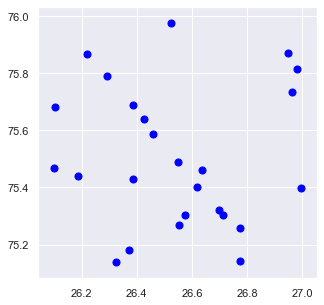

In [15]:
# ax = dfle.plot.scatter(x='lat', y='long', color='DarkGreen',s = 0);
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(dfle['lat'],dfle['lng'],color='blue',s=50)

In [16]:
my_df = dfle.copy()
my_df = my_df.iloc[0:0]
my_df

,__v,_id,animal__id,animal_livestock__id,animal_livestock_breed,animal_livestock_population,animal_nextVaccination,animal_owner__id,animal_owner_address,animal_owner_contact,...,healthCenter_lng,healthCenter_name,healthCenter_pincode,healthCenter_total_affected,healthCenter_total_deaths,healthCenter_total_recovered,healthCenter_web,lat,lng,disease


In [17]:
centers = [0,0]
centers
print(type(centers))

<class 'list'>


## K-Means Clustering

In [18]:
for x in range(count):
    xdf = dfle.loc[dfle['disease'] == x]
#     print(xdf)
    dist_points_from_cluster_center = []
    q = xdf.shape[0]
    temp = xdf.loc[:,['lat','lng']]
    K = range(1,q)
    if(q>1):
        for no_of_clusters in K:
            k_model = KMeans(n_clusters = no_of_clusters)
            k_model.fit(temp)
            dist_points_from_cluster_center.append(k_model.inertia_)

        #Function to find distance between a point and a line
        def calc_distance(x1,y1,a,b,c):
            d=abs((a*x1 + b*y1 +c))/(math.sqrt(a*a + b*b))
            return d
        print(dist_points_from_cluster_center)
        a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[q-2]
        b = K[q-2] - K[0]
        c1 = K[0]*dist_points_from_cluster_center[q-2]
        c2 = K[q-2]*dist_points_from_cluster_center[0]
        c = c1-c2

        distance_of_points_from_line = []
        for k in range(q-1):
            distance_of_points_from_line.append(
            calc_distance(K[k], dist_points_from_cluster_center[k],a,b,c))

        optimum_k = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
    else:
        optimum_k = 1
    kmeans = KMeans(n_clusters = optimum_k, init ='k-means++',random_state=50)

    kmeans.fit(temp)
    y = kmeans.fit_predict(temp)
    
    xdf = xdf.copy()
    xdf['cluster_label'] = (y + (x*10))/10
    
    center = kmeans.cluster_centers_
#     print(type(center))
    xdf['cluster_centre_lat'] = center[0,0]
    xdf['cluster_centre_lng'] = center[0,1]
#     xdf['center'] = center
#     print(centers)
#     print(center)
    centers = np.vstack((centers,center))
    xdf
    my_df = my_df.append(xdf,ignore_index=True,sort = False)

[0.35987159839080163, 0.11391466149383465, 0.04485676777700116, 0.022042897114498413]
[0.6700803878323988, 0.10191126631674817, 0.021766792137498894, 0.001965330092499436]
[0.32867744696134477, 0.008074847636499995]
[0.022849614811332634, 0.0028310738425009344]
[0.42242660115033165, 0.1811091484295001, 0.07809433963516883, 0.018081000346999488, 0.008126561866000487]


Labelled Dataframe

In [19]:
my_df.fillna(0,inplace=True)
my_df.keys()

Index(['__v', '_id', 'animal__id', 'animal_livestock__id',
       'animal_livestock_breed', 'animal_livestock_population',
       'animal_nextVaccination', 'animal_owner__id', 'animal_owner_address',
       'animal_owner_contact', 'animal_owner_email', 'animal_owner_name',
       'animal_owner_pincode', 'animal_status', 'animal_vaccine__id',
       'animal_vaccine_duration', 'animal_vaccine_forHuman',
       'animal_vaccine_name', 'animal_vaccine_scientificName', 'date',
       'disease__id', 'disease_livestock__id', 'disease_livestock_breed',
       'disease_livestock_population', 'disease_morbidity',
       'disease_mortality', 'disease_name', 'disease_precautions',
       'disease_scientificName', 'disease_symptoms', 'disease_total_affected',
       'disease_total_deaths', 'disease_total_recovered',
       'disease_vaccine__id', 'disease_vaccine_duration',
       'disease_vaccine_forHuman', 'disease_vaccine_name',
       'disease_vaccine_scientificName', 'healthCenter__id',
       '

# Centers

In [20]:
# centers.remove([0,0])
centers = np.delete(centers, 0,0) 
centers

array([[26.1014805 , 75.574487  ],
       [26.53845467, 75.45609067],
       [26.96383   , 75.7355    ],
       [26.31626575, 75.297386  ],
       [26.981699  , 75.814503  ],
       [26.49716633, 75.49770133],
       [26.69982867, 75.32094533],
       [26.42065075, 75.63897425],
       [26.736577  , 75.923893  ],
       [26.994771  , 75.397655  ],
       [26.772297  , 75.143578  ]])

In [21]:
labels = my_df['cluster_label']
len(labels)

25

In [22]:
from collections import Counter, defaultdict
x=Counter(labels)

In [23]:
x

Counter({0.1: 3,
         0.0: 2,
         1.0: 1,
         2.0: 4,
         2.1: 1,
         3.0: 3,
         4.0: 3,
         5.0: 4,
         5.1: 2,
         6.0: 1,
         7.0: 1})

# Visualising Points

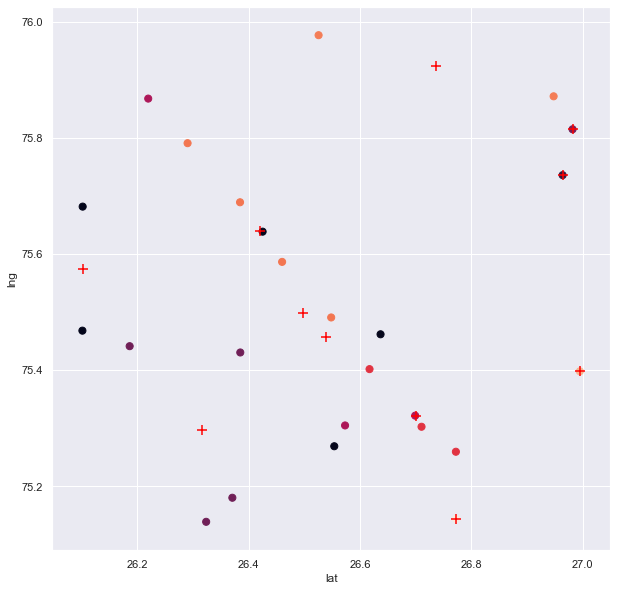

In [24]:
# plt.style.use(['dark_background'])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(my_df['lat'],my_df['lng'],c=labels,s=50)
for i,j in centers:
    ax.scatter(i,j,s=100,c='red',marker='+')
ax.set_xlabel('lat')
ax.set_ylabel('lng')
# plt.colorbar(scatter)

plt.show()

In [25]:
import json

data = centers
list = [{"latitude": x[0], "longitude": x[1]} for x in data]

output = json.dumps(list)

In [26]:
output

'[{"latitude": 26.1014805, "longitude": 75.574487}, {"latitude": 26.538454666666667, "longitude": 75.45609066666667}, {"latitude": 26.963829999999998, "longitude": 75.7355}, {"latitude": 26.31626575, "longitude": 75.297386}, {"latitude": 26.981699, "longitude": 75.814503}, {"latitude": 26.497166333333336, "longitude": 75.49770133333334}, {"latitude": 26.69982866666667, "longitude": 75.32094533333333}, {"latitude": 26.42065075, "longitude": 75.63897425}, {"latitude": 26.736576999999997, "longitude": 75.92389299999999}, {"latitude": 26.994771000000004, "longitude": 75.397655}, {"latitude": 26.772297, "longitude": 75.143578}]'

In [27]:
with open('result.json', 'w') as outfile:
    json.dump(output, outfile,indent = 4)

In [28]:
import json
a=0;
for i in range(my_df.shape[0]):
    ini_string={
        "disease": {
            "_id": my_df["disease__id"][i],
            "livestock": [
                {
                    "_id": my_df["disease_livestock__id"][i],
                    "breed": my_df["disease_livestock_breed"][i],
                    "population": my_df["disease_livestock_population"][i]
                }
            ],
            "vaccine": [
                {
                    "_id": my_df["disease_vaccine__id"][i],
                    "name": my_df["disease_vaccine_name"][i],
                    "scientificName": my_df["disease_vaccine_scientificName"][i],
                    "duration": my_df["disease_vaccine_duration"][i],
                    "forHuman": my_df["disease_vaccine_forHuman"][i]
                }
            ],
            "name": my_df["disease_name"][i],
            "scientificName": my_df["disease_scientificName"][i],
            "precautions" : my_df["disease_precautions"][i],
            "symptoms": my_df["disease_symptoms"][i],
            "morbidity": my_df["disease_morbidity"][i],
            "mortality": my_df["disease_mortality"][i],
            "total_affected": my_df["disease_total_affected"][i],
            "total_deaths": my_df["disease_total_deaths"][i]
        },
        "healthCenter": {
            "_id": my_df["healthCenter__id"][i],
            "address": my_df["healthCenter_address"][i],
            "email": my_df["healthCenter_email"][i],
            "contact": my_df["healthCenter_contact"][i],
            "name": my_df["healthCenter_contact"][i],
            "incharge": my_df["healthCenter_incharge"][i],
            "pincode": my_df["healthCenter_pincode"][i],
            "web": my_df["healthCenter_web"][i],
            "total_recovered":my_df["healthCenter_total_recovered"][i],
            "total_affected": my_df["healthCenter_total_affected"][i],
            "total_deaths": my_df["healthCenter_total_deaths"][i]
            
        },
        "total_recovered":my_df["disease_total_recovered"][i],
        "total_affected": my_df["disease_total_affected"][i],
        "total_deaths": my_df["disease_total_deaths"][i],
        "__v": my_df["__v"][i],
        "radius" :10+my_df["cluster_label"][i],
        "lat": centers[a][0],
        "lng": centers[a][1],
        "flag":1,
        "totalInCluster":x[my_df["cluster_label"][i]]
    }

    def convert(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()

    y=json.dumps(ini_string, default=convert)
    headers = {'Accept' : 'application/json', 'Content-Type' : 'application/json'}
    url="https://diseasex-backend.herokuapp.com/outbreaks"
    r = requests.post(url, data=y,headers=headers)
    if r.status_code==200:
        if a<centers.shape[0]-1:
            a=a+1

In [29]:
print("Clustering Successful !")
print("Data upload to database Successful !")
a

Clustering Successful !
Data upload to database Successful !


10